Summary:

0. SimpleRNN - doesn't work as good as LSTM for long memory
1.   GRU
2.   LSTM
3.   LSTM + Max Pooling gives us the best results in this case



In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Start with a small Time step = T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance -
  # y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [4]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.7702 - accuracy: 0.4876 - val_loss: 0.7028 - val_accuracy: 0.4984
Epoch 2/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5088 - val_loss: 0.6942 - val_accuracy: 0.5056
Epoch 3/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5044 - val_loss: 0.6942 - val_accuracy: 0.4916
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6947 - accuracy: 0.5128 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 5/100
79/79 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5116 - val_loss: 0.6942 - val_accuracy: 0.5180
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5048 - val_loss: 0.6943 - val_accuracy: 0.5132
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6942 - accuracy: 0.5056 - val_loss: 0.6951 - val_accuracy: 0.5040
Epoch 8/100
7

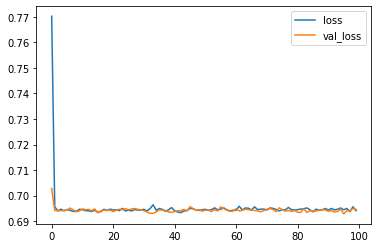

In [5]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [6]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  # optimizer='rmsprop',
#   optimizer='adam',
  optimizer=Adam(learning_rate=0.01),
  # optimizer=SGD(lr=0.1, momentum=0.9),
  metrics=['accuracy'],
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 8ms/step - loss: 0.7106 - accuracy: 0.5036 - val_loss: 0.6856 - val_accuracy: 0.5340
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6802 - accuracy: 0.5656 - val_loss: 0.6648 - val_accuracy: 0.6056
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6475 - accuracy: 0.6504 - val_loss: 0.6187 - val_accuracy: 0.7016
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5811 - accuracy: 0.7456 - val_loss: 0.5422 - val_accuracy: 0.7852
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5118 - accuracy: 0.7880 - val_loss: 0.4796 - val_accuracy: 0.8180
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4486 - accuracy: 0.8224 - val_loss: 0.4196 - val_accuracy: 0.8316
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3880 - accuracy: 0.8600 - val_loss: 0.3594 - val_accuracy: 0.8624
Epoch 8/200
7

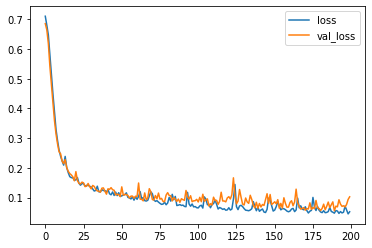

In [8]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

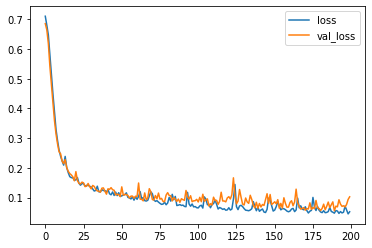

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [10]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [10]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

In [10]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

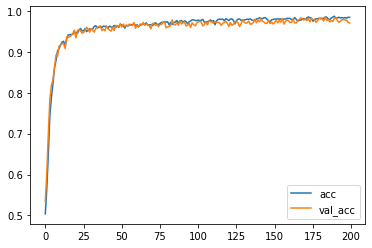

In [11]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [12]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/200
79/79 [==============================] - 3s 14ms/step - loss: 0.6942 - accuracy: 0.5052 - val_loss: 0.6929 - val_accuracy: 0.5176
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.5080 - val_loss: 0.6937 - val_accuracy: 0.4804
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6937 - accuracy: 0.5048 - val_loss: 0.6939 - val_accuracy: 0.4832
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.4944 - val_loss: 0.6931 - val_accuracy: 0.5008
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.4960 - val_loss: 0.6931 - val_accuracy: 0.5080
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6931 - accuracy: 0.5016 - val_loss: 0.6937 - val_accuracy: 0.5080
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6931 - accuracy: 0.4992 - val_loss: 0.6950 - val_accuracy: 0.4816
Epoch 8/200


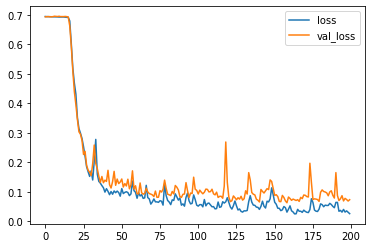

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

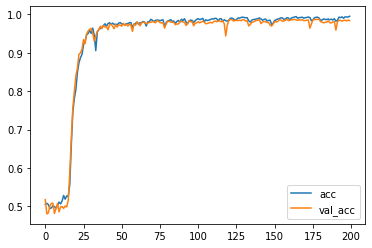

In [14]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [15]:
# Now test our Simple RNN again
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [15]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [15]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

In [15]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

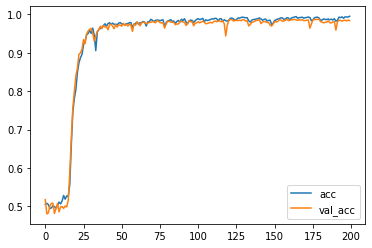

In [16]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [17]:
# Now test our GRU
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
79/79 [==============================] - 4s 21ms/step - loss: 0.6936 - accuracy: 0.5112 - val_loss: 0.6943 - val_accuracy: 0.4960
Epoch 2/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6940 - accuracy: 0.5100 - val_loss: 0.6926 - val_accuracy: 0.5132
Epoch 3/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6930 - accuracy: 0.5144 - val_loss: 0.6944 - val_accuracy: 0.4928
Epoch 4/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6927 - accuracy: 0.5068 - val_loss: 0.6940 - val_accuracy: 0.4988
Epoch 5/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6938 - accuracy: 0.5212 - val_loss: 0.6929 - val_accuracy: 0.5084
Epoch 6/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6932 - accuracy: 0.5136 - val_loss: 0.6948 - val_accuracy: 0.4988
Epoch 7/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6922 - accuracy: 0.5180 - val_loss: 0.6942 - val_accuracy: 0.5016
Epoch 

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

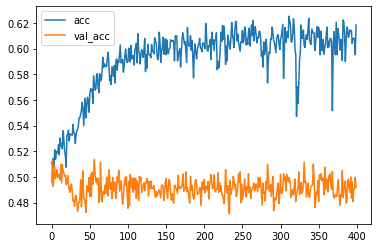

In [18]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [20]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/400
79/79 [==============================] - 4s 26ms/step - loss: 0.6949 - accuracy: 0.4924 - val_loss: 0.6929 - val_accuracy: 0.5044
Epoch 2/400
79/79 [==============================] - 1s 19ms/step - loss: 0.6936 - accuracy: 0.4964 - val_loss: 0.6938 - val_accuracy: 0.5016
Epoch 3/400
79/79 [==============================] - 1s 19ms/step - loss: 0.6931 - accuracy: 0.5104 - val_loss: 0.6924 - val_accuracy: 0.5112
Epoch 4/400
79/79 [==============================] - 2s 19ms/step - loss: 0.6927 - accuracy: 0.5092 - val_loss: 0.6927 - val_accuracy: 0.5036
Epoch 5/400
79/79 [==============================] - 1s 18ms/step - loss: 0.6924 - accuracy: 0.5164 - val_loss: 0.6926 - val_accuracy: 0.5104
Epoch 6/400
79/79 [==============================] - 1s 18ms/step - loss: 0.6918 - accuracy: 0.5180 - val_loss: 0.6930 - val_accuracy: 0.5068
Epoch 7/400
79/79 [==============================] - 1s 19ms/step - loss: 0.6915 - accuracy: 0.5216 - val_loss: 0.6926 - val_accuracy: 0.5188
Epoch 

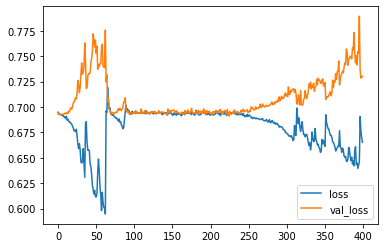

In [21]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [21]:
# Now try a LSTM with Global Max Pooling
# Best results for long distance problems
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=100,
  validation_split=0.5,
)

In [21]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()